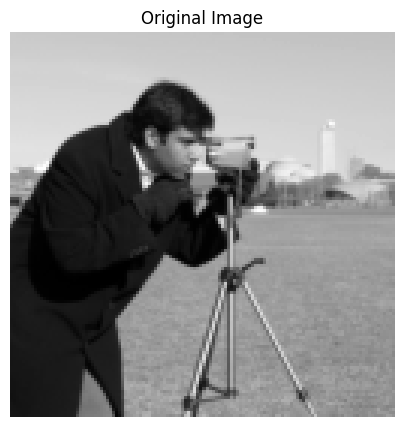

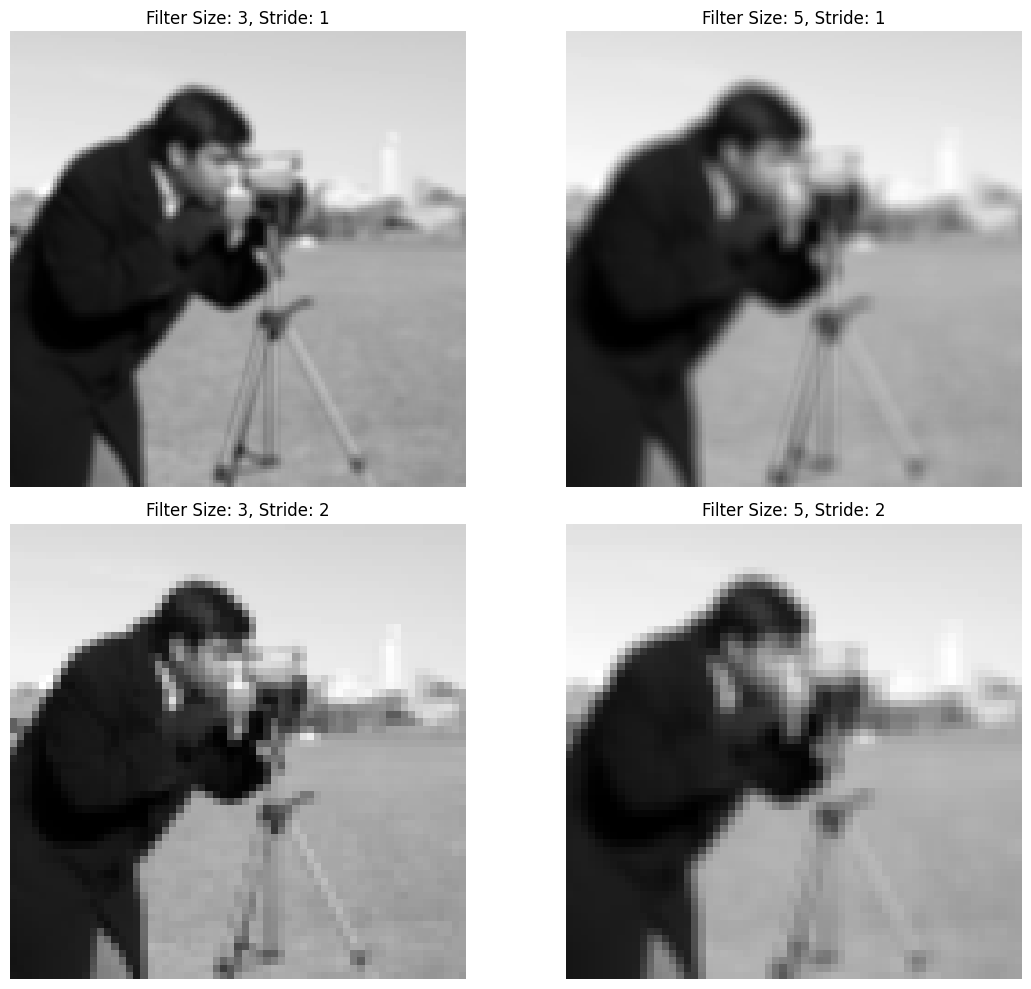

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import data
from skimage.transform import resize

# Load an example grayscale image
image = data.camera()  # Sample grayscale image from skimage
image = resize(image, (128, 128))  # Resize to make operations faster
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Define a function to apply convolution
def apply_convolution(image, filter_size, stride):
    # Create a simple filter
    kernel = np.ones((filter_size, filter_size)) / (filter_size**2)  # Averaging filter
    feature_map = convolve2d(image, kernel, mode='valid')[::stride, ::stride]
    return feature_map

# Test convolution with varying filter sizes and strides
configurations = [
    {"filter_size": 3, "stride": 1},# Try changing the filter size and experiment with the code
    {"filter_size": 5, "stride": 1},
    {"filter_size": 3, "stride": 2},
    {"filter_size": 5, "stride": 2},
]

# Visualizing the results
plt.figure(figsize=(12, 10))
for idx, config in enumerate(configurations, 1):
    filter_size = config['filter_size']
    stride = config['stride']
    feature_map = apply_convolution(image, filter_size, stride)

    plt.subplot(2, 2, idx)
    plt.imshow(feature_map, cmap='gray')
    plt.title(f"Filter Size: {filter_size}, Stride: {stride}")
    plt.axis('off')

plt.tight_layout()
plt.show()


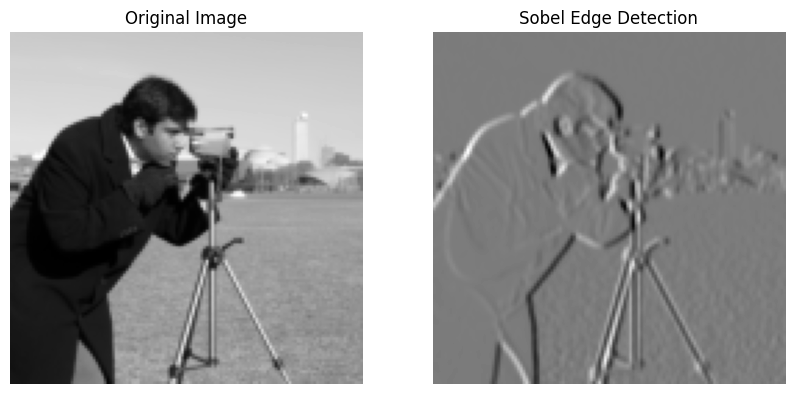

In [ ]:
from scipy.signal import convolve2d

def apply_convolution(image, filter_size=None, stride=1, use_sobel=False):
    if use_sobel:
        # Sobel kernel for edge detection
        kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])  # Horizontal Sobel filter
    else:

        kernel = np.ones((filter_size, filter_size)) / (filter_size**2)

    # Apply convolution and adjust for stride
    feature_map = convolve2d(image, kernel, mode='valid')[::stride, ::stride]
    return feature_map
feature_map = apply_convolution(image, use_sobel=True, stride=1)
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Feature Map with Sobel Filter
sobel_feature_map = apply_convolution(image, use_sobel=True, stride=1)
plt.subplot(1, 2, 2)
plt.imshow(sobel_feature_map, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.show()
